In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load Dataset
df = pd.read_csv("dataset.csv", sep=",", encoding='utf-8')

In [6]:
df.head()

,Emotion,Paragraph,Title
0,Surprised,"""Discovering recent advancements in medicine a...","""Breakthrough in Cancer Research"""
1,Surprised,"""Came across an article about an unexpected sc...","""New Brain Research Shocks Scientists"""
2,Surprised,"""Found an article on surprising benefits of me...","""Unexpected Benefits of Meditation"""
3,Surprised,"""Just read an article about a newly discovered...","""New Species Discovery Shocks Scientists"""
4,Surprised,"""I didn�t expect that at all! It came out of n...",Unexpected News


In [7]:
# Value Counts
df['Emotion'].value_counts()

Fear          89
Neutral       88
Happy         80
Manic         75
Depressive    75
Sad           65
Surprised     47
Shocked       36
Name: Emotion, dtype: int64

In [8]:
df.head()

,Emotion,Paragraph,Title
0,Surprised,"""Discovering recent advancements in medicine a...","""Breakthrough in Cancer Research"""
1,Surprised,"""Came across an article about an unexpected sc...","""New Brain Research Shocks Scientists"""
2,Surprised,"""Found an article on surprising benefits of me...","""Unexpected Benefits of Meditation"""
3,Surprised,"""Just read an article about a newly discovered...","""New Species Discovery Shocks Scientists"""
4,Surprised,"""I didn�t expect that at all! It came out of n...",Unexpected News


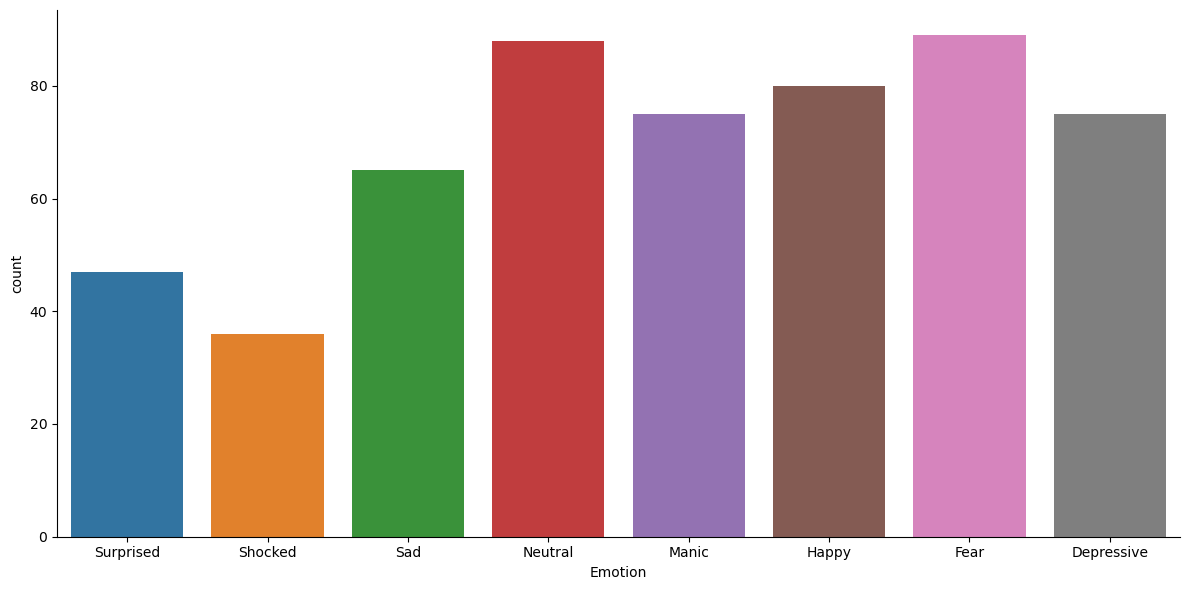

In [9]:
# Plot
sns.catplot(x='Emotion', kind='count', data=df, height=6, aspect=2)

In [10]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
# User handles
df['Clean_Paragraph'] = df['Paragraph'].astype(str).apply(nfx.remove_userhandles)

In [12]:
# Stopwords
df['Clean_Paragraph'] = df['Clean_Paragraph'].astype(str).apply(nfx.remove_stopwords)

In [13]:
df

,Emotion,Paragraph,Title,Clean_Paragraph
0,Surprised,"""Discovering recent advancements in medicine a...","""Breakthrough in Cancer Research""","""Discovering recent advancements medicine read..."
1,Surprised,"""Came across an article about an unexpected sc...","""New Brain Research Shocks Scientists""","""Came article unexpected scientific discovery ..."
2,Surprised,"""Found an article on surprising benefits of me...","""Unexpected Benefits of Meditation""","""Found article surprising benefits meditation ..."
3,Surprised,"""Just read an article about a newly discovered...","""New Species Discovery Shocks Scientists""","""Just read article newly discovered animal spe..."
4,Surprised,"""I didn�t expect that at all! It came out of n...",Unexpected News,"""I didn�t expect all! came nowhere, I�m trying..."
...,...,...,...,...
550,Depressive,"""I wake up, but it feels like I�m still asleep...",Trapped in Darkness,"""I wake up, feels like I�m asleep, trapped haz..."
551,Depressive,"""I feel numb to everything. Even the things I ...",Numb and Empty,"""I feel numb everything. things enjoy feel lik..."
552,Depressive,"""I feel like I�m carrying the weight of the wo...",Crushed by the World,"""I feel like I�m carrying weight world shoulde..."
553,Depressive,"""Everything feels pointless today. I don�t wan...",Pointless Existence,"""Everything feels pointless today. don�t want ..."


In [14]:
# User handles
df['Clean_Title'] = df['Title'].astype(str).apply(nfx.remove_userhandles)

In [15]:
# Stopwords
df['Clean_Title'] = df['Clean_Title'].astype(str).apply(nfx.remove_stopwords)

In [16]:
df

,Emotion,Paragraph,Title,Clean_Paragraph,Clean_Title
0,Surprised,"""Discovering recent advancements in medicine a...","""Breakthrough in Cancer Research""","""Discovering recent advancements medicine read...","""Breakthrough Cancer Research"""
1,Surprised,"""Came across an article about an unexpected sc...","""New Brain Research Shocks Scientists""","""Came article unexpected scientific discovery ...","""New Brain Research Shocks Scientists"""
2,Surprised,"""Found an article on surprising benefits of me...","""Unexpected Benefits of Meditation""","""Found article surprising benefits meditation ...","""Unexpected Benefits Meditation"""
3,Surprised,"""Just read an article about a newly discovered...","""New Species Discovery Shocks Scientists""","""Just read article newly discovered animal spe...","""New Species Discovery Shocks Scientists"""
4,Surprised,"""I didn�t expect that at all! It came out of n...",Unexpected News,"""I didn�t expect all! came nowhere, I�m trying...",Unexpected News
...,...,...,...,...,...
550,Depressive,"""I wake up, but it feels like I�m still asleep...",Trapped in Darkness,"""I wake up, feels like I�m asleep, trapped haz...",Trapped Darkness
551,Depressive,"""I feel numb to everything. Even the things I ...",Numb and Empty,"""I feel numb everything. things enjoy feel lik...",Numb
552,Depressive,"""I feel like I�m carrying the weight of the wo...",Crushed by the World,"""I feel like I�m carrying weight world shoulde...",Crushed World
553,Depressive,"""Everything feels pointless today. I don�t wan...",Pointless Existence,"""Everything feels pointless today. don�t want ...",Pointless Existence


In [17]:
# Selecting 'Clean_Paragraph' and 'Clean_Title' as features
Xfeatures = df[['Clean_Paragraph', 'Clean_Title']]
# Selecting 'Emotion' as the label
ylabels = df['Emotion']

In [18]:
Xfeatures

,Clean_Paragraph,Clean_Title
0,"""Discovering recent advancements medicine read...","""Breakthrough Cancer Research"""
1,"""Came article unexpected scientific discovery ...","""New Brain Research Shocks Scientists"""
2,"""Found article surprising benefits meditation ...","""Unexpected Benefits Meditation"""
3,"""Just read article newly discovered animal spe...","""New Species Discovery Shocks Scientists"""
4,"""I didn�t expect all! came nowhere, I�m trying...",Unexpected News
...,...,...
550,"""I wake up, feels like I�m asleep, trapped haz...",Trapped Darkness
551,"""I feel numb everything. things enjoy feel lik...",Numb
552,"""I feel like I�m carrying weight world shoulde...",Crushed World
553,"""Everything feels pointless today. don�t want ...",Pointless Existence


In [19]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [20]:
# Build Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.compose import ColumnTransformer

In [21]:
# Create a column transformer to apply the CountVectorizer to both text columns
preprocessor = ColumnTransformer( transformers=[ ('Clean_Title', CountVectorizer(), 'Clean_Title'), ('Clean_Paragraph', CountVectorizer(), 'Clean_Paragraph') ], remainder='passthrough' )

In [22]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[ ('preprocessor', preprocessor), ('lr', LogisticRegression(solver='lbfgs')) ])

In [23]:
# Train and Fit Data
pipe_lr.fit(x_train.astype(str), y_train.astype(str))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Clean_Title',
                                                  CountVectorizer(),
                                                  'Clean_Title'),
                                                 ('Clean_Paragraph',
                                                  CountVectorizer(),
                                                  'Clean_Paragraph')])),
                ('lr', LogisticRegression())])

In [24]:
pipe_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Clean_Title',
                                                  CountVectorizer(),
                                                  'Clean_Title'),
                                                 ('Clean_Paragraph',
                                                  CountVectorizer(),
                                                  'Clean_Paragraph')])),
                ('lr', LogisticRegression())])

In [25]:
# Check Accuracy
pipe_lr.score(x_test.astype(str),y_test.astype(str))

0.7604790419161677

In [26]:
# Make A Prediction
title = "Finding Hope During Sad Days" 
paragraph = "Reading through self-help articles and looking for ways to cope with feelings of sadness and loneliness. I’m searching for advice on handling emotions, reading about stories of people who overcame difficult times, and finding comfort in knowing that there are ways to manage these feelings, even though it feels overwhelming right now"

In [27]:
new_data = pd.DataFrame({ 'Clean_Title': [title], 'Clean_Paragraph': [paragraph] })

In [28]:
pipe_lr.predict(new_data.astype(str))

array(['Sad'], dtype=object)

In [29]:
# Prediction Prob
pipe_lr.predict_proba(new_data.astype(str))

array([[3.47966069e-02, 7.55633381e-04, 1.06262973e-02, 1.70027760e-03,
        7.71024237e-03, 9.43219005e-01, 4.80641317e-04, 7.11295875e-04]])

In [30]:
# To Know the classes
pipe_lr.classes_

array(['Depressive', 'Fear', 'Happy', 'Manic', 'Neutral', 'Sad',
       'Shocked', 'Surprised'], dtype=object)

In [31]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_logistic.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [32]:
loaded_model = joblib.load("emotion_classifier_logistic.pkl")

In [33]:
new_data = pd.DataFrame({ 'Clean_Title': [title], 'Clean_Paragraph': [paragraph] })

In [34]:
loaded_model.predict(new_data.astype(str))[0]

'Sad'